In [ ]:
#Evaluation 3

In [ ]:
#Primero se utilizaran los mapas del trabajo anterior

In [1]:
import os

import geopandas as gpd
from  fiona import listlayers

#maps
alemaniaMaps='https://github.com/Clases-y-Evaluaciones-DelaCruz-Diana/Evaluation3-DelaCruz/raw/main/maps/alemaniaMaps_4839.gpkg'

#layers in maps
listlayers(alemaniaMaps)

['countries', 'cities', 'rivers']

In [2]:
alemania=gpd.read_file(alemaniaMaps,layer='countries')
alemania_cities=gpd.read_file(alemaniaMaps,layer='cities')
alemania_rivers=gpd.read_file(alemaniaMaps,layer='rivers') 

In [3]:
alemania.crs.to_epsg()==alemania_cities.crs.to_epsg()==alemania_rivers.crs.to_epsg()

True

<Axes: >

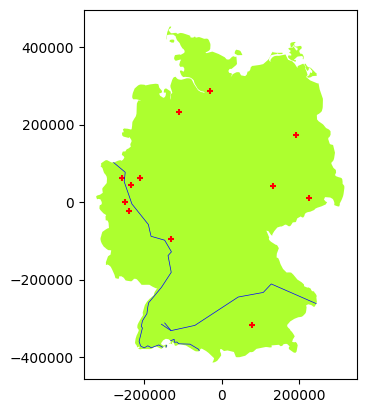

In [4]:
base = alemania.plot(facecolor="greenyellow")
alemania_rivers.plot(edgecolor='blue', linewidth=0.5,ax=base)
alemania_cities.plot(marker='+', color='red', markersize=15,ax=base)

In [ ]:
#Ejercicio 1

In [5]:
alemania

,COUNTRY,geometry
0,Germany,"MULTIPOLYGON (((-228178.470 -198681.783, -2286..."


In [6]:
alemania.boundary

0    MULTILINESTRING ((-228178.470 -198681.783, -22...
dtype: geometry

<Axes: >

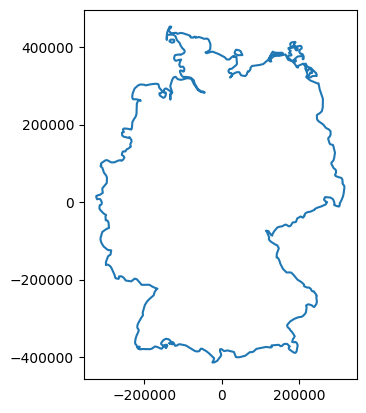

In [7]:
alemania.boundary.plot()

In [8]:
type(alemania.boundary)

geopandas.geoseries.GeoSeries

In [9]:
# convirtiendo a GDF
alemania.boundary.to_frame()

,0
0,"MULTILINESTRING ((-228178.470 -198681.783, -22..."


In [10]:
# conversion
alemania_border=alemania.boundary.to_frame() 

# new column (optional)
alemania_border['name']='Alemania' 

# renaming the geometry column
alemania_border.rename(columns={0:'geometry'},inplace=True) 

#setting the geometry (the name is not enough)
#cuando se coloca el set_geometry se debe colocar en comillas el nombre de la geometria
alemania_border = alemania_border.set_geometry("geometry")

# verifying:
alemania_border.crs

<Projected CRS: EPSG:4839>
Name: ETRS89 / LCC Germany (N-E)
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Germany - onshore - states of Baden-Wurtemberg, Bayern, Berlin, Brandenburg, Bremen, Hamburg, Hessen, Mecklenburg-Vorpommern, Niedersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Saarland, Sachsen, Sachsen-Anhalt, Schleswig-Holstein, Thuringen.
- bounds: (5.86, 47.27, 15.04, 55.09)
Coordinate Operation:
- name: LCC Germany
- method: Lambert Conic Conformal (2SP)
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [11]:
alemania_border

,geometry,name
0,"MULTILINESTRING ((-228178.470 -198681.783, -22...",Alemania


In [ ]:
#Ejercicio 2

In [14]:
alemania_states=gpd.read_file(os.path.join("maps","DEU_adm","DEU_adm2.shp"))
alemania_municipalities=gpd.read_file(os.path.join("maps","DEU_adm","DEU_adm3.shp"))

DriverError: maps\DEU_adm\DEU_adm2.shp: No such file or directory